In [1]:
import pandas as pd

# Load the datasets
food_df = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food.csv")
food_nutrient_df = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient.csv",low_memory=False)
nutrient_df = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\nutrient.csv")

# Display the first few rows of each DataFrame to understand their structure
food_df.head(), food_nutrient_df.head(), nutrient_df.head()

(   fdc_id           data_type            description  food_category_id  \
 0  319874         sample_food  HUMMUS, SABRA CLASSIC              16.0   
 1  319875  market_acquisition  HUMMUS, SABRA CLASSIC              16.0   
 2  319876  market_acquisition  HUMMUS, SABRA CLASSIC              16.0   
 3  319877     sub_sample_food                 Hummus              16.0   
 4  319878     sub_sample_food                 Hummus              16.0   
 
   publication_date  
 0       2019-04-01  
 1       2019-04-01  
 2       2019-04-01  
 3       2019-04-01  
 4       2019-04-01  ,
         id  fdc_id  nutrient_id  amount  data_points  derivation_id  min  max  \
 0  2201847  319877         1051   56.30          1.0            1.0  NaN  NaN   
 1  2201845  319877         1002    1.28          1.0            1.0  NaN  NaN   
 2  2201846  319877         1004   19.00          1.0            1.0  NaN  NaN   
 3  2201844  319877         1007    1.98          1.0            1.0  NaN  NaN   
 4  2

In [2]:
# Step 1: Identify nutrient IDs for key nutrients
key_nutrients = ['Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference']
nutrient_ids = nutrient_df[nutrient_df['name'].str.contains('|'.join(key_nutrients), case=False, na=False)]

# Step 2: Merge datasets
merged_df = food_nutrient_df.merge(nutrient_df, left_on='nutrient_id', right_on='id')
merged_df = merged_df.merge(food_df[['fdc_id', 'food_category_id']], on='fdc_id')

# Filter for key nutrients only
filtered_df = merged_df[merged_df['name'].str.contains('|'.join(key_nutrients), case=False, na=False)]

# Aggregate average amount by food category and nutrient
grouped = filtered_df.groupby(['food_category_id', 'name'])['amount'].mean().reset_index()

# Pivot for plotting
pivot_df = grouped.pivot(index='food_category_id', columns='name', values='amount')

pivot_df.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16288\2723012950.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  nutrient_ids = nutrient_df[nutrient_df['name'].str.contains('|'.join(key_nutrients), case=False, na=False)]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16288\2723012950.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = merged_df[merged_df['name'].str.contains('|'.join(key_nutrients), case=False, na=False)]


name,"Carbohydrate, by difference",Energy,Energy (Atwater General Factors),Energy (Atwater Specific Factors),Protein
food_category_id,,,,,
1.0,4.231648,573.209677,240.989058,242.720572,13.883290
2.0,5.300000,157.500000,34.500000,61.000000,4.250000
4.0,0.840000,2156.500000,895.000000,833.000000,0.000000
5.0,0.000000,494.125000,150.824114,157.032420,23.541054
6.0,7.176667,88.833333,42.500000,37.000000,1.430000


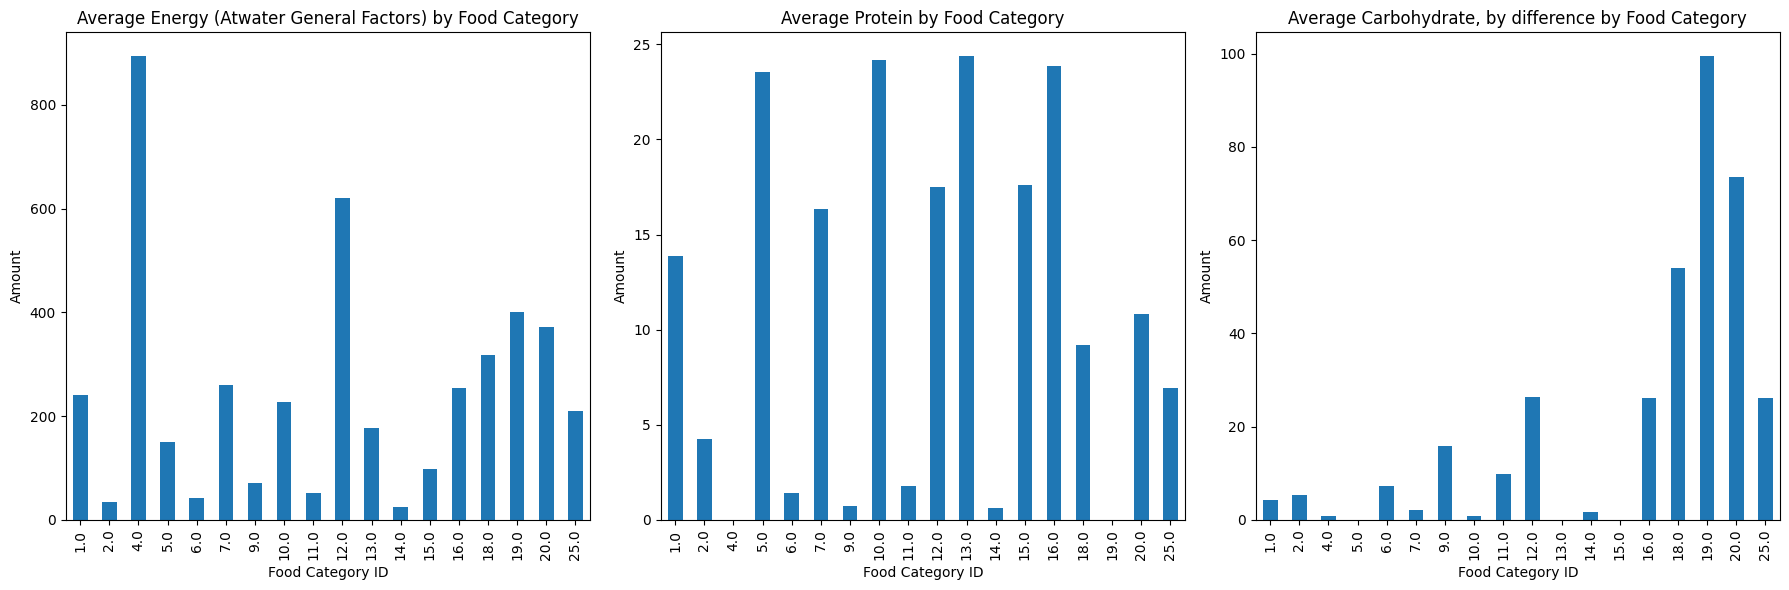

In [3]:
import matplotlib.pyplot as plt

# Select relevant columns
plot_df = pivot_df[['Energy (Atwater General Factors)', 'Protein', 'Carbohydrate, by difference']].copy()

# Drop categories with missing values
plot_df = plot_df.dropna()

# Plot bar chart for each nutrient
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)

for ax, nutrient in zip(axes, plot_df.columns):
    plot_df[nutrient].plot(kind='bar', ax=ax)
    ax.set_title(f'Average {nutrient} by Food Category')
    ax.set_xlabel('Food Category ID')
    ax.set_ylabel('Amount')

plt.tight_layout()
plt.show()


# Interesting Fact

Category 20 stands out with exceptionally high average calories and carbohydrates, likely due to nutrient-dense items like chia seeds or grains, making it a fascinating outlier in the dataset!

# Conclusion

The analysis reveals distinct nutrient distributions across food categories. Categories rich in grains or seeds (e.g., Category 20) show higher carbohydrate and calorie content, while others like dairy (Category 1) or meat (Category 13) may lean towards protein and fat. These insights can guide dietary planning or food product development.

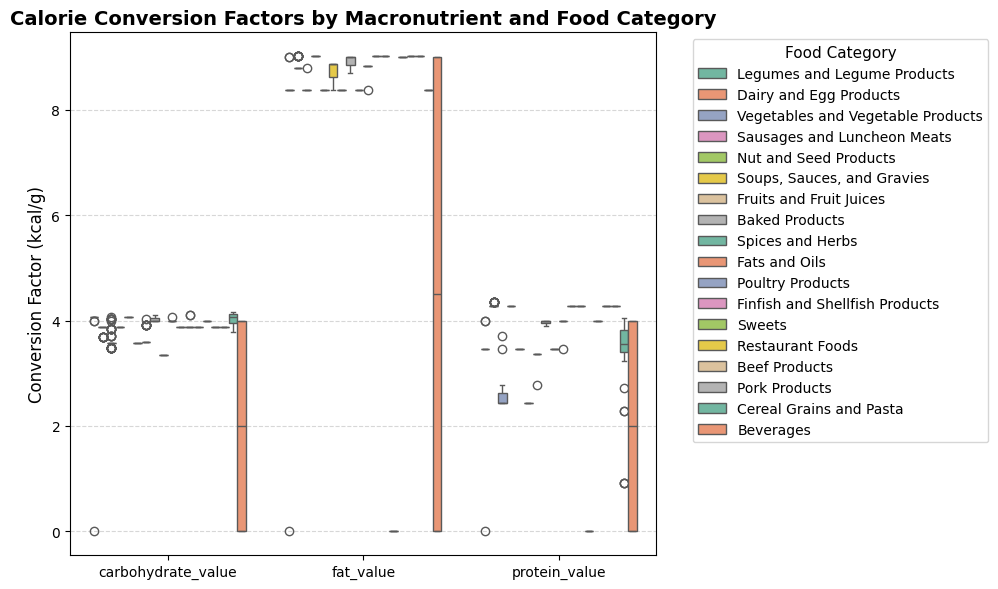

In [18]:
food = food_df
food_category = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_category.csv")
food_calorie_conversion = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_calorie_conversion_factor.csv")
food_nutrient_conversion_factor = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient_conversion_factor.csv")

# Step 1: Merge calorie conversion with conversion factor ID table
df_cf = pd.merge(food_calorie_conversion, food_nutrient_conversion_factor,
                 left_on='food_nutrient_conversion_factor_id', right_on='id', how='left')

# Step 2: Merge with food table
df_cf = pd.merge(df_cf, food, on='fdc_id', how='left')

# Step 3: Merge with food category table
df_cf = pd.merge(df_cf, food_category, left_on='food_category_id', right_on='id', how='left',
                 suffixes=('', '_category'))

# Select and reshape relevant data
df_cf_clean = df_cf[['carbohydrate_value', 'fat_value', 'protein_value', 'description', 'description_category']]
df_cf_melted = df_cf_clean.melt(id_vars='description_category',
                                value_vars=['carbohydrate_value', 'fat_value', 'protein_value'],
                                var_name='Macronutrient', value_name='Conversion Factor')
df_cf_melted.dropna(inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cf_melted, x='Macronutrient', y='Conversion Factor', hue='description_category', palette='Set2')
plt.title('Calorie Conversion Factors by Macronutrient and Food Category', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Conversion Factor (kcal/g)', fontsize=12)
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Conclusion

- Most fat values are centered around 9 kcal/g.

- Carbohydrate and protein values typically hover near 4 kcal/g

  ***Variation Across Categories***

- Certain food categories show wider variation in conversion factors

- Likely due to differences in digestibility, fiber content, or chemical structure of nutrients in various food matrices.

  ***Outliers Exist***

- Data entry anomalies

- Specialized food products (e.g., sugar alcohols)

- Experimental derivation techniques or different calculation standards.

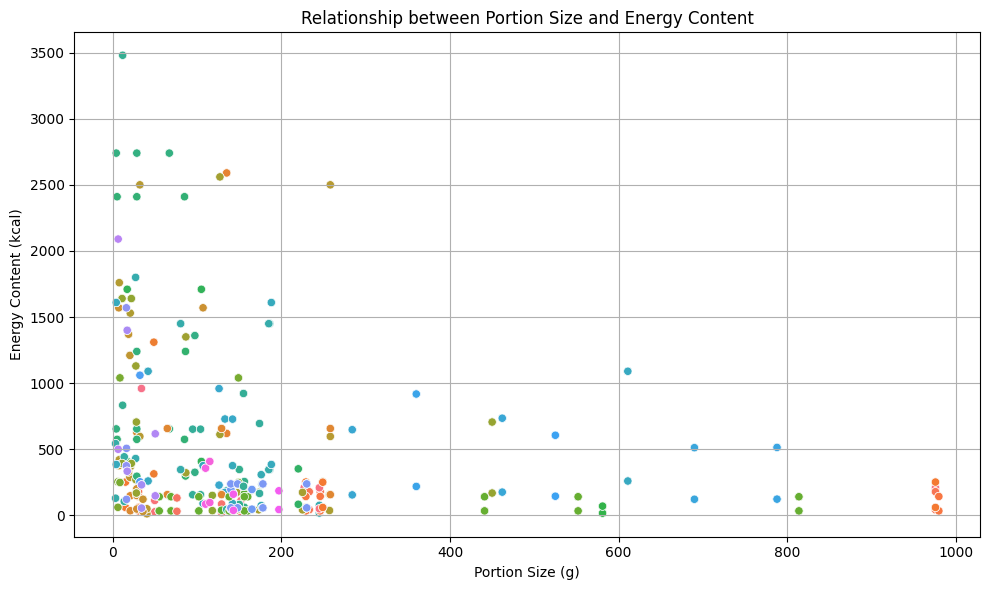

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
food = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food.csv")
food_nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient.csv",low_memory=False)
conversion = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient_conversion_factor.csv")
food_portion = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_portion.csv")
nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\nutrient.csv")

# Rename nutrient 'id' to 'nutrient_id' for merging
nutrient = nutrient.rename(columns={"id": "nutrient_id"})

# Merge nutrient details into food_nutrient
fn = pd.merge(food_nutrient, nutrient, on="nutrient_id")

# Merge conversion factors (just fdc_id is available here)
fn = pd.merge(fn, conversion, on="fdc_id", how="left")

# Merge in portion size information
fn = pd.merge(fn, food_portion, on="fdc_id", how="left")

# Merge in food details
fn = pd.merge(fn, food, on="fdc_id", how="left")

# Compute the adjusted nutrient content per portion
fn['adjusted_nutrient'] = fn['amount_x']  # nutrient amount

# Filter for "Energy" nutrient
energy_data = fn[fn['name'] == 'Energy']

# Plot: Portion Size vs Energy Content
plt.figure(figsize=(10, 6))
sns.scatterplot(data=energy_data, x="gram_weight", y="adjusted_nutrient", hue="description", legend=False)
plt.xlabel("Portion Size (g)")
plt.ylabel("Energy Content (kcal)")
plt.title("Relationship between Portion Size and Energy Content")
plt.tight_layout()
plt.grid(True)
plt.show()


# Conclusion

- There is an overall positive relationship—foods with larger portion sizes tend to have higher energy content. This is expected, as larger portions typically contain more of the food substance and, consequently, more calories.
- ***Variability in Energy Density:*** Despite the trend, the plot shows considerable scatter. This indicates that not all foods with similar portion sizes have the same energy content. Some foods pack more calories per gram than others. This variability is often due to differences in food composition (e.g., fat vs. water content, fiber content, etc.).
- ***Importance of Nutrient Density:*** The variation suggests that energy density (calories per gram) can be quite different among foods. A small portion of a high-energy-dense food (like those rich in fats) might provide as many calories as a larger portion of a less energy-dense food (like fruits or vegetables).

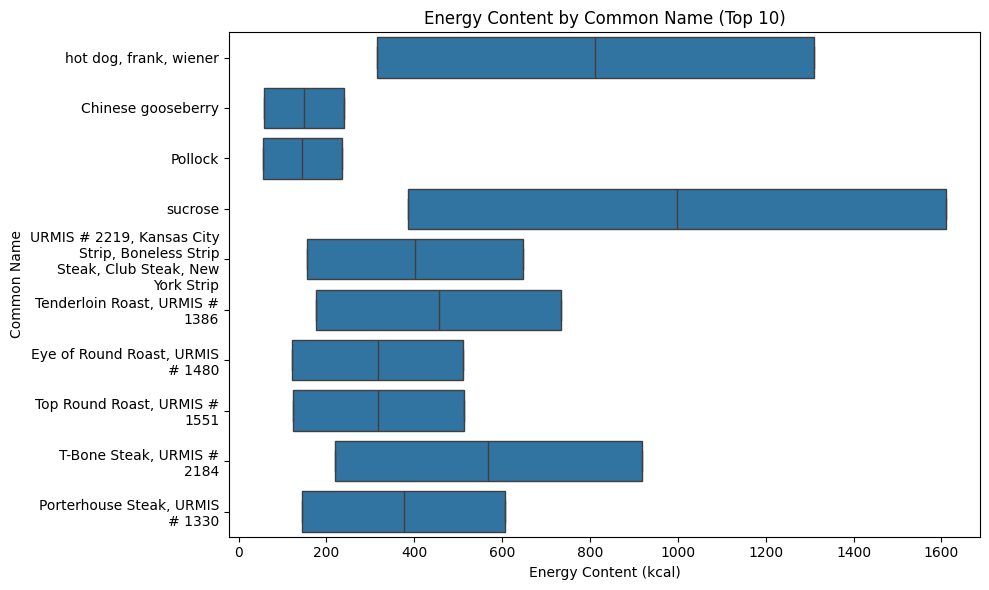

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
# Load datasets
food = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food.csv")
food_nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient.csv",low_memory=False)
conversion = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient_conversion_factor.csv")
nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\nutrient.csv")
food_attribute = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_attribute.csv")
food_attribute_type = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_attribute_type.csv")

# --- Prepare Nutrient Data ---
# Rename 'id' to 'nutrient_id' for merging
nutrient = nutrient.rename(columns={"id": "nutrient_id"})

# Merge nutrient details with food_nutrient
fn = pd.merge(food_nutrient, nutrient, on="nutrient_id")

# Merge with conversion factors
fn = pd.merge(fn, conversion, on="fdc_id", how="left")

# Merge with food details
fn = pd.merge(fn, food, on="fdc_id", how="left")

# Compute nutrient content (as-is)
fn['adjusted_nutrient'] = fn['amount']

# Filter for the nutrient of interest (Energy)
energy_data = fn[fn['name'] == 'Energy']

# --- Prepare Food Attribute Data ---
# Rename food_attribute_type for clarity
food_attribute_type = food_attribute_type.rename(columns={"id": "food_attribute_type_id", "name": "attribute_type_name"})

# Merge food_attribute with attribute_type
fa = pd.merge(food_attribute, food_attribute_type, on="food_attribute_type_id", how="left")

# Merge nutrient data with food attribute data
energy_attr = pd.merge(energy_data, fa, on="fdc_id", how="left")

# --- Analyze a Specific Attribute Type ---
selected_attribute_type = "Common Name"  # Can also try "Attribute"

# Filter for selected attribute type
energy_attr_filtered = energy_attr[energy_attr['attribute_type_name'] == selected_attribute_type]

# Plot if data exists
top_common_names = energy_attr_filtered['value'].value_counts().nlargest(10).index
filtered_plot_data = energy_attr_filtered[energy_attr_filtered['value'].isin(top_common_names)].copy()

# Wrap long labels for better readability
filtered_plot_data['wrapped_value'] = filtered_plot_data['value'].apply(lambda x: '\n'.join(textwrap.wrap(str(x), width=25)))

# Plot using horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_plot_data, y="wrapped_value", x="adjusted_nutrient", orient="h")
plt.ylabel("Common Name")
plt.xlabel("Energy Content (kcal)")
plt.title("Energy Content by Common Name (Top 10)")
plt.tight_layout()
plt.show()

# Conclusion

- The boxplot shows that energy content (kcal) varies substantially across different common names. Some food groups or items are consistently higher or lower in energy content, while others display a wider range. This suggests that even within a single common name, there can be variability in formulation or portion size that affects calorie content.
- For several common names, the interquartile range (the central box in the plot) is relatively narrow, indicating that the foods categorized under that name tend to have consistent energy levels. This can be useful when making dietary choices where consistent energy intake is important.
- These insights highlight the importance of detailed food labeling and categorization. Knowing which food groups exhibit high variability in energy content can inform better dietary recommendations or interventions.

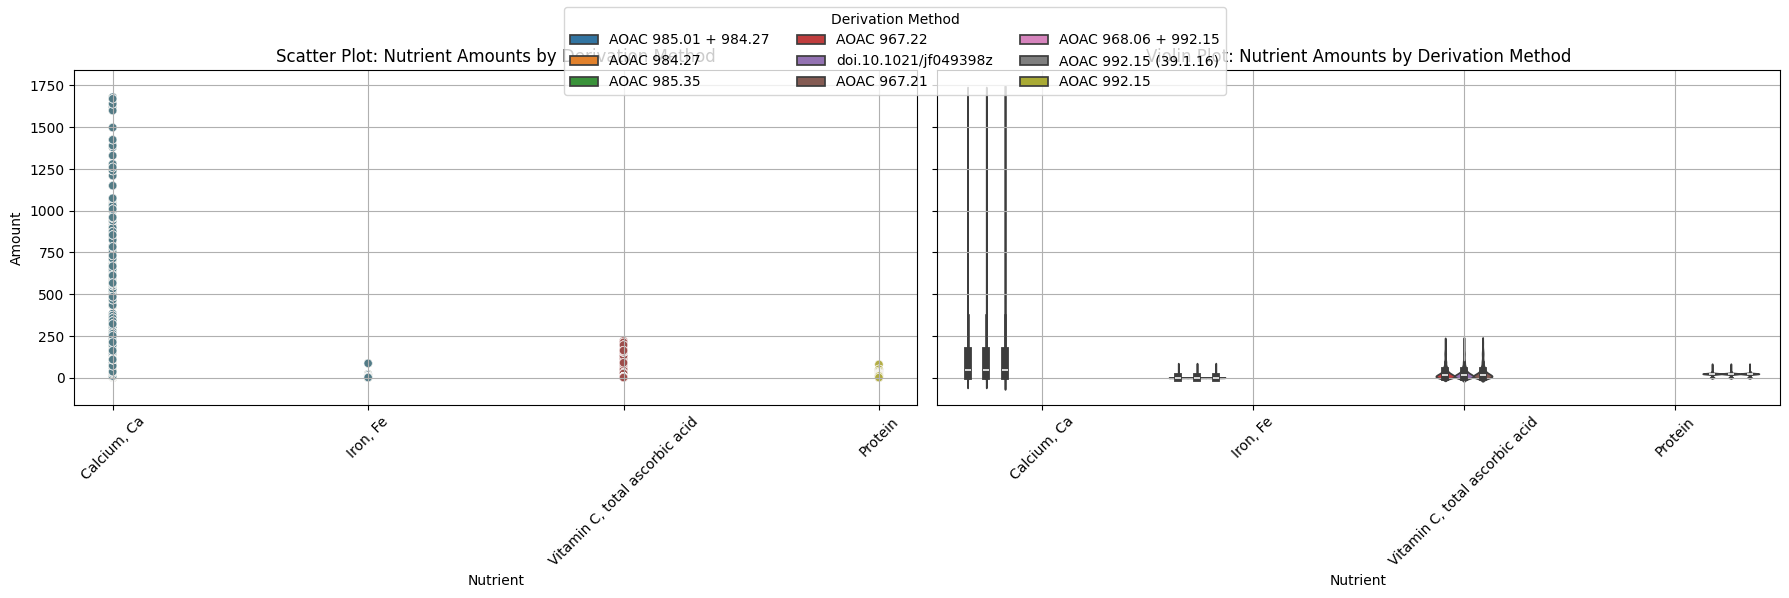

In [1]:
# Full clean version of the code to generate scatter and violin plots as subplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
food = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food.csv")
food_nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\food_nutrient.csv",low_memory=False)
lab_method = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\lab_method.csv")
lab_method_code = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\lab_method_code.csv")
lab_method_nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\lab_method_nutrient.csv")
nutrient = pd.read_csv(r"D:\MlProjects\Dimpy_project\FoodData_Central_foundation_food_csv_2024-10-31\nutrient.csv")

# Step 1: Merge food_nutrient with nutrient to get nutrient names
fn_merged = pd.merge(food_nutrient, nutrient, left_on='nutrient_id', right_on='id', how='left')

# Step 2: Merge with lab_method_nutrient on nutrient_id
fn_merged = pd.merge(fn_merged, lab_method_nutrient, on='nutrient_id', how='left')

# Step 3: Merge with lab_method on lab_method_id
fn_merged = pd.merge(fn_merged, lab_method, left_on='lab_method_id', right_on='id', how='left')

# Step 4: Clean and prepare data for plotting
plot_df = fn_merged[['name', 'amount', 'description']].dropna()

# Select a few nutrients to focus on
selected_nutrients = ['Protein', 'Calcium, Ca', 'Iron, Fe', 'Vitamin C, total ascorbic acid']
filtered_plot_df = plot_df[plot_df['name'].isin(selected_nutrients)]

# Step 5: Create subplots for scatter and violin plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Scatter plot
sns.scatterplot(data=filtered_plot_df, x='name', y='amount', hue='description', alpha=0.7, ax=axes[0])
axes[0].set_title('Scatter Plot: Nutrient Amounts by Derivation Method')
axes[0].set_xlabel('Nutrient')
axes[0].set_ylabel('Amount')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Violin plot
sns.violinplot(data=filtered_plot_df, x='name', y='amount', hue='description', ax=axes[1])
axes[1].set_title('Violin Plot: Nutrient Amounts by Derivation Method')
axes[1].set_xlabel('Nutrient')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust legend and layout
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Derivation Method', loc='upper center', ncol=3)
axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Conclusion

- Each derivation method (lab method) results in slightly different reported nutrient values, even for the same nutrient.

- This variation is especially clear in nutrients like Protein and Iron, where the spread (range) and center of values differ by method.

### Nutrients Affected Differently

- ***Protein:*** Shows consistent values across methods, but some methods report slightly higher/lower amounts.
- ***Vitamin C:*** Has high variability; some derivation methods result in much wider value distributions — this could be due to its sensitivity to storage, testing conditions, or different forms.
- ***Iron & Calcium:*** Show moderate variation depending on the method — some methods might systematically report higher or lower amounts.